In [2]:
# !pip install matplotlib
# !pip install torchvision

In [6]:

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\texta\AppData\Roaming\Python\Python312\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [4]:
from torchvision import datasets
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None
                                   )


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\texta\AppData\Roaming\Python\Python312\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [3]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)


(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes

In [7]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


In [5]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())

NameError: name 'train_data' is not defined

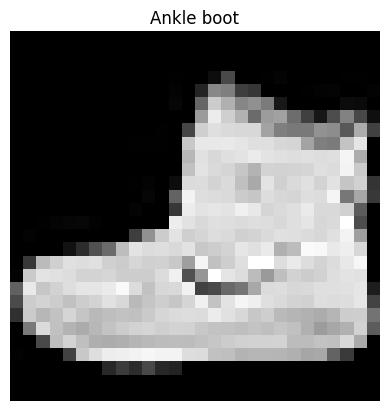

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

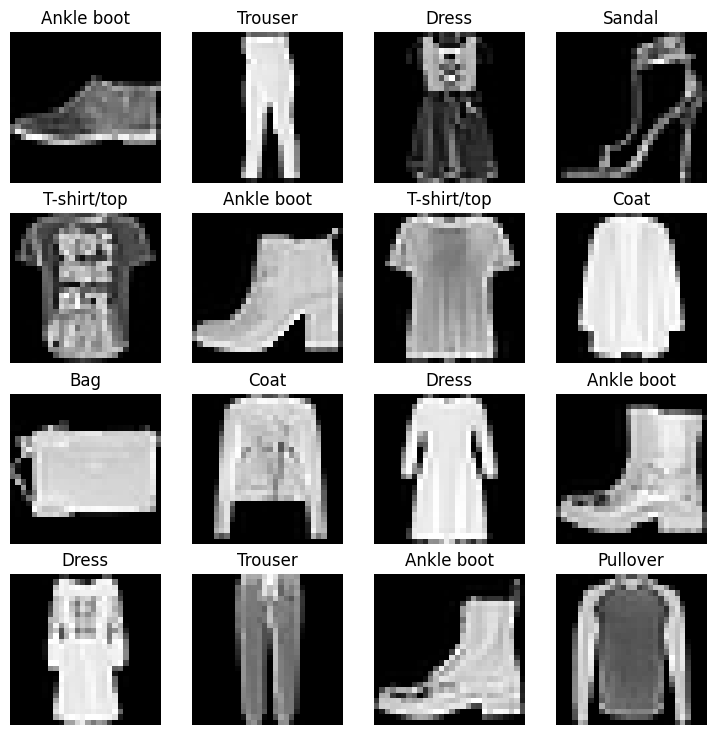

In [10]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12f31ef1100>,
 <torch.utils.data.dataloader.DataLoader at 0x12f31e926c0>)

In [12]:

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000012F31EF1100>, <torch.utils.data.dataloader.DataLoader object at 0x0000012F31E926C0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


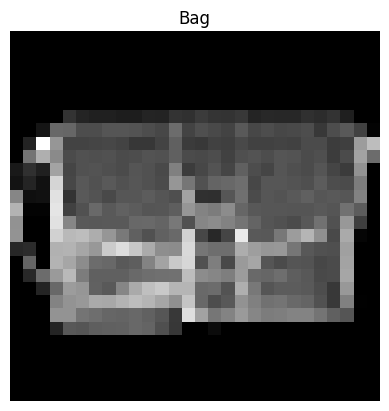

In [14]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [15]:
flatten_model = nn.Flatten()

In [16]:
x = train_features_batch[0]

In [17]:
x.shape

torch.Size([1, 28, 28])

In [18]:
output = flatten_model(x)

In [19]:
output.shape

torch.Size([1, 784])

In [20]:
output.squeeze().shape

torch.Size([784])

In [21]:
from torch import nn

In [22]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               hidden_units2,
               output_shape:int):
    super().__init__()
    self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=output_shape),
    )

  def forward(self, x):
    return self.linear_stack(x)

In [23]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=30,
    hidden_units2=20,
    output_shape=len(class_names)
).to('cuda')
model_0

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [24]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [25]:
torch.cuda.is_available()

True

In [26]:

model_0

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [27]:
dummy_x = torch.rand([1, 1, 28, 28]).to('cuda')
model_0(dummy_x)

tensor([[ 0.1942,  0.0183,  0.1227,  0.0332, -0.1062,  0.0092,  0.2007, -0.0034,
         -0.1603,  0.1273]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [29]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=.1)

In [30]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [31]:
start_time = timer()
end_time = timer()
end_time - start_time

2.7999994927085936e-05

In [2]:
# from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# epochs = 30

# for epoch in tqdm(range(epochs)):
#   print(epoch)
#   train_loss = 0
#   for batch, (x, y) in enumerate(train_dataloader):
#     model_0.train()
#     x, y = x.to(device), y.to(device)
#     y_pred = model_0(x)

#     loss = loss_fn(y_pred, y)
#     train_loss += loss
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     if batch % 400 == 0:
#       print(batch * len(x), len(train_dataloader.dataset))

#   train_loss /= len(train_dataloader)
#   test_loss, test_acc = 0, 0
#   model_0.eval()
#   with torch.inference_mode():
#     for x_test, y_test in test_dataloader:
#       x_test, y_test = x_test.to(device), y_test.to(device)
#       test_pred = model_0(x_test)
#       test_loss += loss_fn(test_pred, y_test)
#       test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
#     test_loss /= len(test_dataloader)
#     test_acc /= len(test_dataloader)
#   print(f"{train_loss:.4f}, {test_loss:.4f}, {test_acc}")

In [34]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               hidden_units2,
               output_shape:int):
    super().__init__()
    self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=output_shape),
            nn.Relu
    )

  def forward(self, x: torch.Tensor):
    return self.linear_stack(x)

In [1]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0

    model.train()

    for batch, (x, y) in enumerate(data_loader):
        x, y = x.to(device), y.to(device)

        y_pred = model(x)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print()

    train_loss /= len(train_downloader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    

NameError: name 'device' is not defined